# 1. Limpieza de Datos <img src="fcfm.png" style="width: 80px;" style="float: right;"  align="right"  margin-right= "50px"/>

032 E2024 Inteligencia Artificial 

Dr. Luis Ángel Gutiérrez Rodríguez

Ismael Sandoval Aguilar 

3 de Febrero de 2024

El código importa herramientas para el análisis y visualización de datos (pandas y matplotlib), cálculos numéricos (numpy) y selección aleatoria (`random.choices`).

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from random import choices


El código utiliza pandas (importado como pd) para leer un archivo CSV llamado 'Actividad1-StudentsPerformance.csv' y almacenar sus datos en un DataFrame llamado df.

In [110]:
df = pd.read_csv('Actividad1-StudentsPerformance.csv')

El código utiliza el método `head()` de pandas para mostrar las primeras 5 filas del DataFrame `df`.

In [111]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


El código define una función `simple_mean` y una clase `Student` para manejar datos de estudiantes:

1. **Función `simple_mean(a, b)`**:
   - Calcula y retorna el promedio simple de dos números `a` y `b`.

2. **Clase `Student`**:
   - Inicializa un objeto `Student` con atributos basados en valores de un DataFrame `df` (género, etnia, nivel educativo, tipo de almuerzo, si toman un curso de preparación para el examen, puntajes en matemáticas, lectura, escritura y el puntaje promedio).
   - Implementa métodos mágicos `__gt__` y `__lt__` para comparar objetos `Student` según su `average_score`.
     - `__gt__`: Retorna `True` si el `average_score` del objeto es mayor que el de otro objeto `Student`.
     - `__lt__`: Retorna `True` si el `average_score` del objeto es menor que el de otro objeto `Student`.
   - Implementa el método mágico `__add__` para 'sumar' dos objetos `Student`, creando una lista `result` que contiene:
     - Una elección aleatoria entre los atributos correspondientes de ambos estudiantes (género, etnia, nivel educativo, tipo de almuerzo, curso de preparación para el examen).
     - El promedio simple de los puntajes (matemáticas, lectura, escritura) y del puntaje promedio total de ambos estudiantes, usando la función `simple_mean`.

El propósito de esta clase parece ser manejar y comparar información de estudiantes, permitiendo operaciones como la comparación de puntajes promedios y la combinación de información de dos estudiantes.

In [112]:
# Too lazy to repeat the same operation
def simple_mean(a, b):
        return (a + b) / 2

# Class for each student
class Student:
    def __init__(self, df):
        self.gender = df.iloc[0]
        self.ethnicity = df.iloc[1]
        self.level_education = df.iloc[2]
        self.lunch = df.iloc[3]
        self.test_course = df.iloc[4]
        self.math_score = df.iloc[5]
        self.reading_score = df.iloc[6]
        self.writing_score = df.iloc[7]
        self.average_score = (df.iloc[5] +  df.iloc[6] + df.iloc[7]) / 3

    def __gt__(self, other):
        if (self.average_score > other.average_score):
            return True
        else:
            return False
        
    def __lt__(self, other):
        if (self.average_score < other.average_score):
            return True
        else:
            return False

    def __add__(self, other):

        result = [
            choices([self.gender, other.gender]),
            choices([self.ethnicity, other.ethnicity]),
            choices([self.level_education, other.level_education]),
            choices([self.lunch, other.lunch]),
            choices([self.test_course, other.test_course]),
            simple_mean(self.math_score, other.math_score),
            simple_mean(self.reading_score, other.reading_score),
            simple_mean(self.writing_score, other.writing_score),
            simple_mean(self.average_score, other.average_score),
        ]

        return result

El código crea una lista `array_instances`, donde cada elemento es una instancia de la clase `Student`, inicializada con los datos de cada fila del DataFrame `df`. Luego, muestra los atributos del primer objeto `Student` en la lista.

1. **Generar la lista `array_instances`**:
   - Utiliza una comprensión de lista para iterar sobre cada fila (`i`) del DataFrame `df`.
   - Para cada fila, crea una instancia de `Student` pasando la fila correspondiente (`df.iloc[i]`) al constructor de `Student`.
   - Almacena cada instancia de `Student` en la lista `array_instances`.

2. **Mostrar atributos del primer objeto `Student`**:
   - Usa la función `vars()` para obtener un diccionario de los atributos del primer objeto `Student` en la lista (`array_instances[0]`).
   - Esto incluiría atributos como `gender`, `ethnicity`, `level_education`, `lunch`, `test_course`, `math_score`, `reading_score`, `writing_score`, y `average_score`.

In [113]:
# Generate an array of objets 
array_instances = [Student(df.iloc[i]) for i in range(len(df))]

# Confirm that the array contains the required data
vars(array_instances[0])

{'gender': 'female',
 'ethnicity': 'group B',
 'level_education': "bachelor's degree",
 'lunch': 'standard',
 'test_course': 'none',
 'math_score': 72,
 'reading_score': 72,
 'writing_score': 74,
 'average_score': 72.66666666666667}

El código compara dos objetos `Student`, específicamente el primero (`array_instances[0]`) y el segundo (`array_instances[1]`), utilizando el operador mayor que (`>`), el cual ha sido definido en la clase `Student` por el método `__gt__`.

El método `__gt__` compara los objetos `Student` basándose en su `average_score`. Si el `average_score` del primer objeto `Student` (`array_instances[0]`) es mayor que el del segundo objeto `Student` (`array_instances[1]`), el resultado de `array_instances[0] > array_instances[1]` será `True`. De lo contrario, será `False`.

In [114]:
# Confirm that the greater operator works
array_instances[0] > array_instances[1]

False

El código está usando el operador menor que (`<`) para comparar dos objetos `Student`, específicamente el primero (`array_instances[0]`) y el segundo (`array_instances[1]`), basándose en su atributo `average_score`. La lógica para este operador está definida en el método `__lt__` de la clase `Student`.

El método `__lt__` evalúa si el `average_score` del primer objeto `Student` (`array_instances[0]`) es menor que el del segundo objeto `Student` (`array_instances[1]`). Si es así, `array_instances[0] < array_instances[1]` retornará `True`; si no, retornará `False`.

In [115]:
# Confirm that the lesser operator works
array_instances[0] < array_instances[1]

True

El código está intentando 'sumar' el primer objeto `Student` (`array_instances[0]`) consigo mismo utilizando el operador de adición (`+`), que ha sido personalizado en la clase `Student` a través del método `__add__`.

El método `__add__` combina atributos de dos objetos `Student`. Para atributos categóricos (como `gender`, `ethnicity`, `level_education`, `lunch`, `test_course`), selecciona aleatoriamente uno de los dos valores correspondientes. Para atributos numéricos (como `math_score`, `reading_score`, `writing_score`, y `average_score`), calcula el promedio de los dos valores correspondientes usando la función `simple_mean`.

En este caso, dado que el mismo objeto `Student` se está 'sumando' consigo mismo, la selección aleatoria de atributos categóricos elegirá entre dos valores idénticos (por lo que el resultado será el mismo valor que el original), y el promedio de los puntajes numéricos será el mismo puntaje original.

El resultado de `array_instances[0] + array_instances[0]` será una lista que contiene estos valores combinados o promediados.

In [116]:
# Confirm that the addition operator works
array_instances[0] + array_instances[0]

[['female'],
 ['group B'],
 ["bachelor's degree"],
 ['standard'],
 ['none'],
 72.0,
 72.0,
 74.0,
 72.66666666666667]

El código proporcionado realiza las siguientes operaciones para cada columna en el DataFrame `df`:

1. **Iteración por Columnas**:
   - Utiliza un bucle `for` para iterar a través de cada columna en `df` (accedidas con `df.columns`).

2. **Conteo de Valores Únicos**:
   - Dentro del bucle, calcula el recuento de valores únicos para la columna actual con `df[col].value_counts()`. Esto proporciona la frecuencia de cada valor único en la columna.

3. **Visualización de Datos**:
   - Grafica los conteos de valores únicos como un gráfico de barras (`.plot(kind='bar')`).
   - Establece el título del gráfico como el nombre de la columna actual con `plt.title(col)`.
   - Muestra el gráfico con `plt.show()`.

Funcionalidad Detallada:
- **`df[col].value_counts()`**: Cuenta cuántas veces aparece cada valor único en la columna `col` del DataFrame `df`.
- **`.plot(kind='bar')`**: Crea un gráfico de barras con las frecuencias de los valores únicos de la columna.
- **`plt.title(col)`**: Asigna el nombre de la columna actual como título del gráfico.
- **`plt.show()`**: Muestra el gráfico. Esta función se llama después de configurar el gráfico para asegurarse de que se muestre correctamente.

Por cada columna en `df`, el código genera y muestra un gráfico de barras que representa la distribución de frecuencias de los valores en esa columna. Esto es útil para entender rápidamente cómo se distribuyen los datos en cada característica (columna) del conjunto de datos.

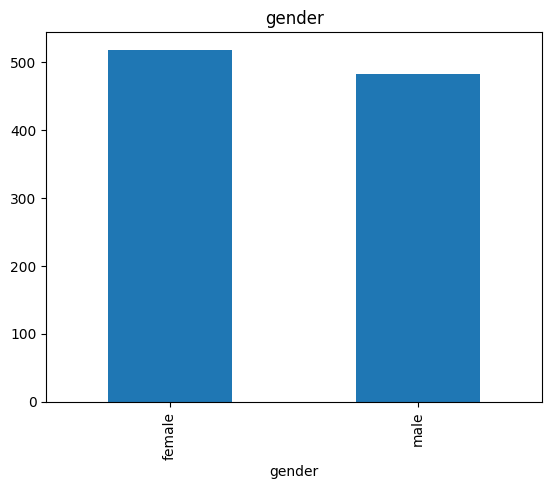

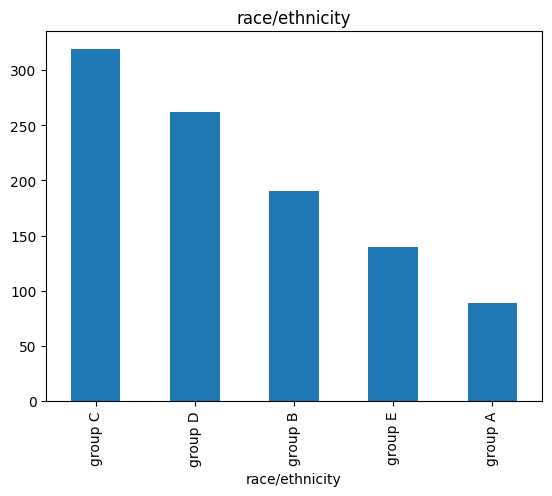

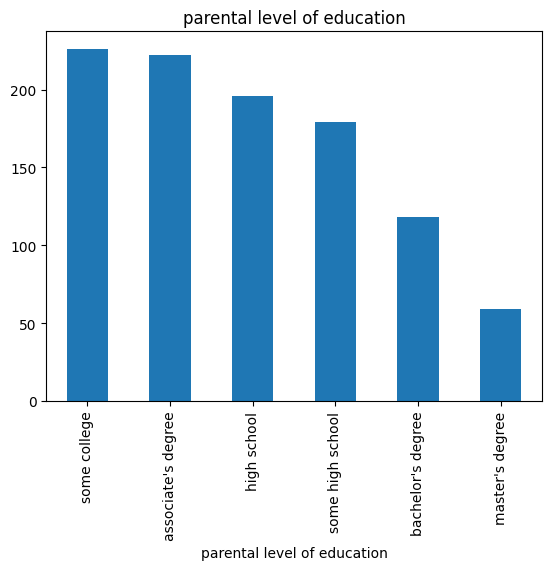

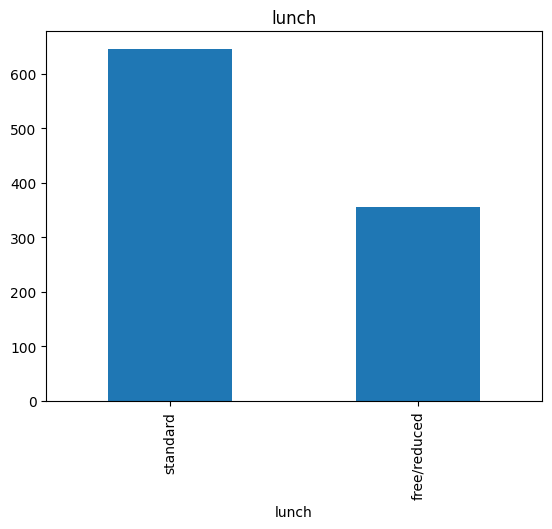

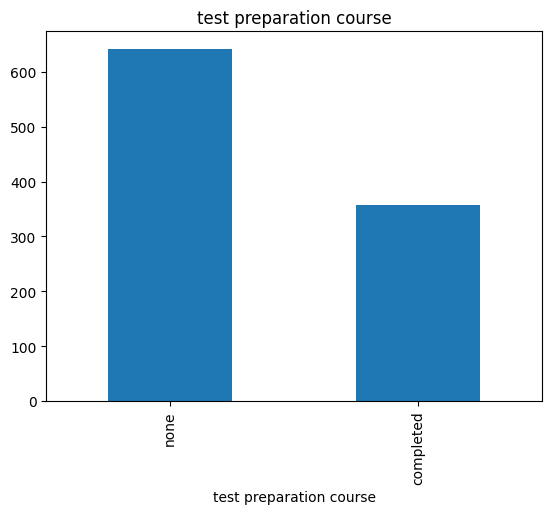

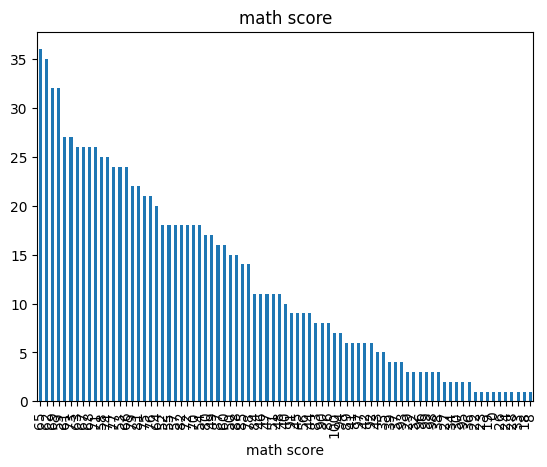

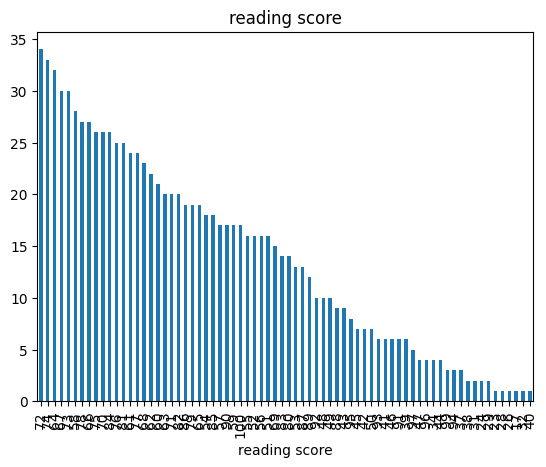

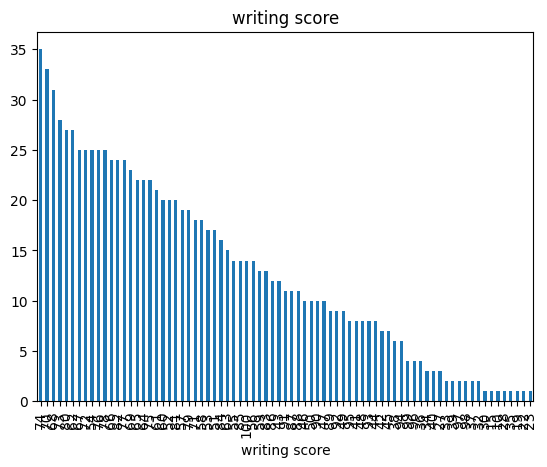

In [133]:
for col in df.columns:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()